In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pneumonia_predictor.backend.data_fetcher import load_data
from pneumonia_predictor.backend.rf_active_smote import RfActiveSMOTE
from pneumonia_predictor.backend.rf_smote import RfSMOTE
from pneumonia_predictor.backend.tester import ModelTester

In [2]:
X_train, y_train, X_test, y_test = (
    load_data("pseudoset/X_train"),
    load_data("pseudoset/y_train"),
    load_data("pseudoset/X_test"),
    load_data("pseudoset/y_test"),
)

In [3]:
rf_smote = RfSMOTE(X_train, y_train, X_test, y_test, "pneumonia")
rf_active_smote = RfActiveSMOTE(X_train, y_train, X_test, y_test, "pneumonia")

In [4]:
tester = ModelTester(rf_smote, rf_active_smote)

In [5]:
tester.run_tests(10)

In [6]:
tester.model_a_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.494872,0.498723,0.494872,0.495360,0.495957
1,2,0.497436,0.500746,0.497436,0.498031,0.498412
2,3,0.492308,0.495247,0.492308,0.492949,0.493203
3,4,0.512821,0.517331,0.512821,0.513128,0.514025
4,5,0.510256,0.516560,0.510256,0.509725,0.511700
5,6,0.502564,0.504035,0.502564,0.503089,0.503063
6,7,0.520513,0.525696,0.520513,0.520598,0.521830
7,8,0.487179,0.491878,0.487179,0.487355,0.488398
8,9,0.451282,0.457422,0.451282,0.449549,0.452384
9,10,0.466667,0.470569,0.466667,0.467130,0.467758


In [7]:
tester.model_b_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.497949,0.496521,0.496495,0.496256,0.496805
1,2,0.502051,0.502384,0.502395,0.501466,0.502074
2,3,0.496923,0.496368,0.496352,0.495886,0.496382
3,4,0.489231,0.490393,0.490359,0.488988,0.489743
4,5,0.502051,0.501941,0.501951,0.501339,0.501821
5,6,0.512308,0.514568,0.514555,0.512224,0.513414
6,7,0.489744,0.491898,0.491948,0.489467,0.490764
7,8,0.502051,0.506313,0.506244,0.501748,0.504089
8,9,0.505128,0.508813,0.508745,0.504901,0.506897
9,10,0.494359,0.498716,0.498771,0.493924,0.496443


In [8]:
tester.compare_res

,Metrics,t-value,p-value
0,accuracy,-0.728922,0.484585
1,precision,-0.371511,0.718852
2,recall,-0.899296,0.391920
3,f1-score,-0.632021,0.543092


## Feature importance (mean decrease in impurity - MDI)

In [11]:
feature_names = [
    "age",
    "sex",
    "fatigue",
    "cough_phlegm",
    "chronic_resp_disease",
    "chronic_kidney_disease",
    "diabetes_mellitus",
    "heart_failure",
    "cancer",
    "systoic_bp",
    "dias_bp",
    "pulse_rate",
    "resp_rate",
    "temp",
    "hemoglobin",
    "hematocrit",
    "rbc",
    "wbc",
    "platelets",
]

### RfSMOTE

In [12]:
start_time = time.time()
importances = rf_smote.classifier.feature_importances_
rf_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_smote.classifier.estimators_], axis=0
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.032 seconds


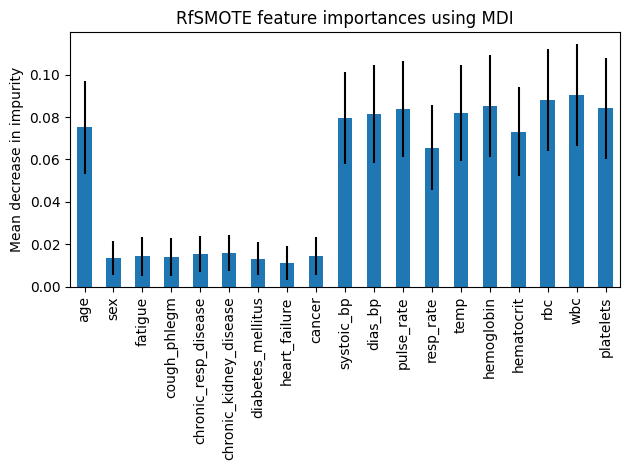

In [13]:
rf_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_smote_importances.plot.bar(yerr=rf_smote_std, ax=ax)
ax.set_title("RfSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### RfActiveSMOTE

In [14]:
start_time = time.time()
importances = rf_active_smote.classifier.feature_importances_
rf_active_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_active_smote.classifier.estimators_],
    axis=0,
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.026 seconds


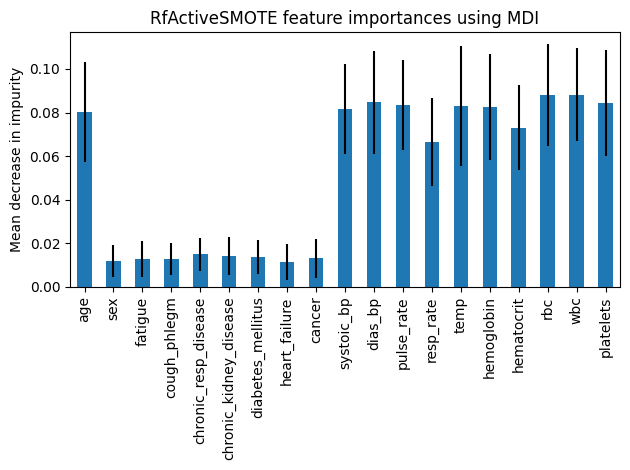

In [15]:
rf_active_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_active_smote_importances.plot.bar(yerr=rf_active_smote_std, ax=ax)
ax.set_title("RfActiveSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()